**CS 4501 - Digital Signal Processing**

Phyl Peng (hp9psb), Brian Mbogo (bpm4pkz), Anna Williamson (amw4uet)

*Image filter design for different noise distributions*

In [15]:
from scipy.fft import ifft2
from scipy import signal
from PIL import Image
from statistics import median

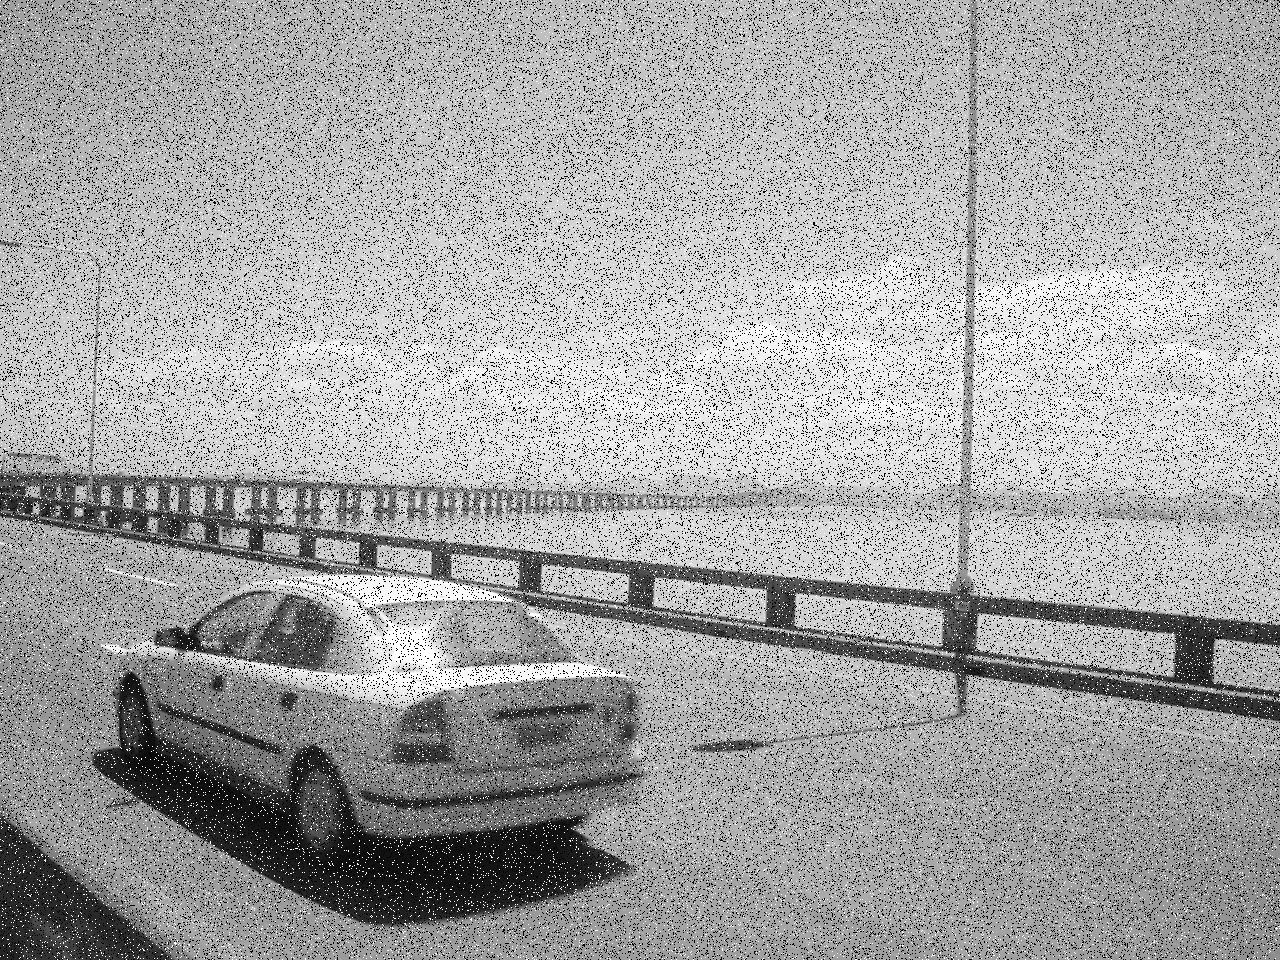

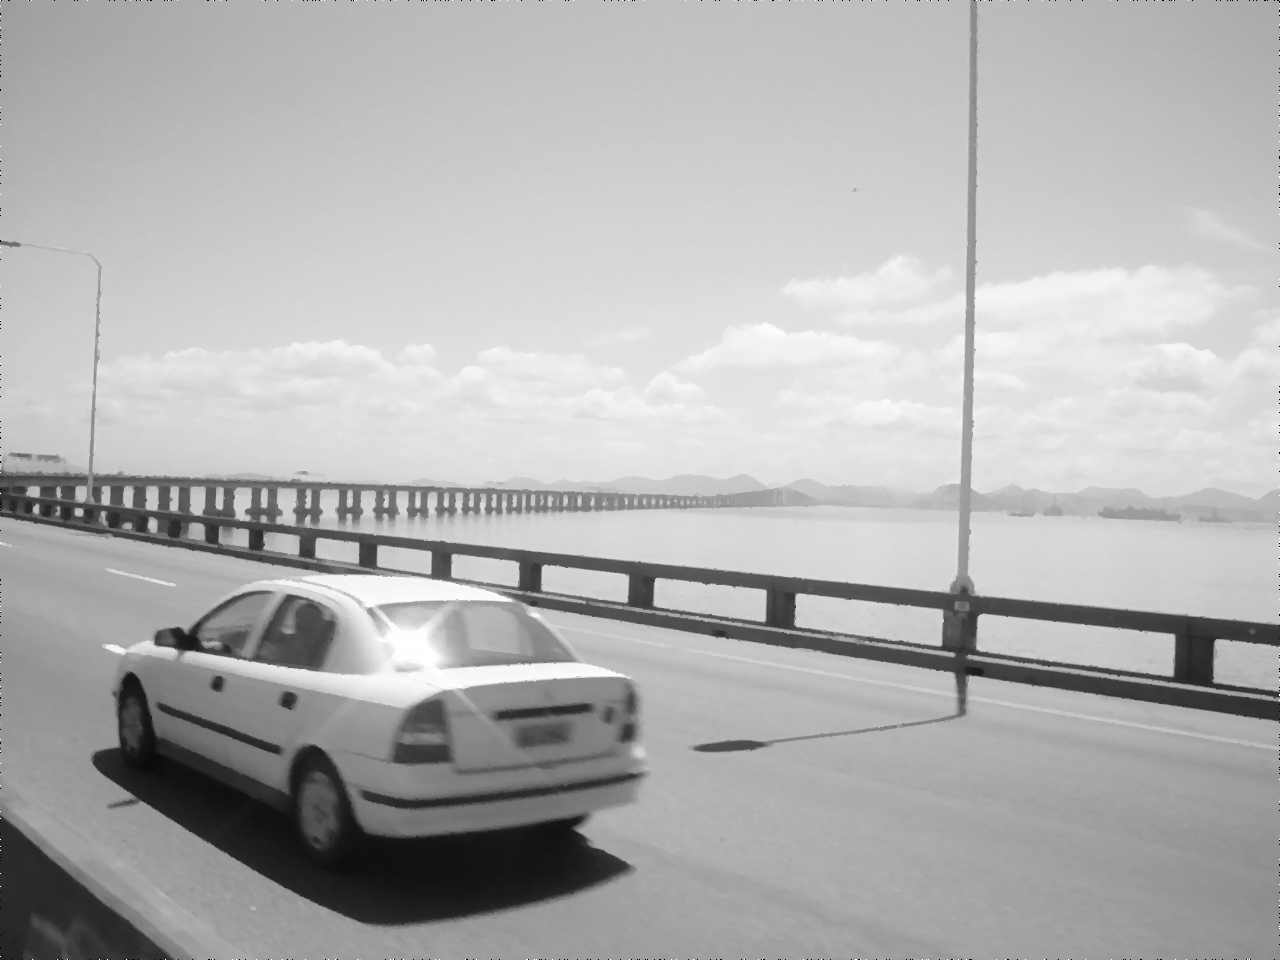

In [3]:
# Filter implementation to handle saltpepper noise

'''
SOURCES:

https://en.wikipedia.org/wiki/Salt-and-pepper_noise
https://www.cs.auckland.ac.nz/courss/compsci373s1c/PatricesLectures/Image%20Filtering.pdf
https://www.geeksforgeeks.org/python-pil-getpixel-method/
https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil#:~:text=If%20you%20have%20an%20L,stores%20a%20greyscale%2C%20not%20colour.
https://ijesc.org/upload/a2d11768dad7f56db1cc12bb3650879a.A%20Comparison%20of%20Salt%20and%20Pepper%20Noise%20Removal%20Filters.pdf
'''

'''
NOTES:

- "An effective noise reduction method for this type of noise is a median filter or a morphological filter."
- first attempt: median filter
- note: images are in "L"-mode... maps to black and white pixels/greyscale
- a median filter is the best of a variety of filters to handle salt and pepper noise
'''


def median_pixel(width, height, w, h, px):
    if (w != 0 and w != width-1 and h != 0 and h != height-1): # don't compute the edges
        px[w, h] = median([px[w, h+1], px[w, h-1], px[w+1, h], px[w-1, h], px[w-1, h-1], px[w+1, h-1], px[w+1, h+1], px[w-1, h+1], px[w, h]])
    return


def median_filter(im):
    px = im.load()
    width, height = im.size
    for w in range(0, width):
        for h in range(0, height):
            median_pixel(width, height, w, h, px)
    return

 
# load image
im = Image.open(r"saltpepper_car.jpg")
display(im)

# filter image
median_filter(im)
display(im)


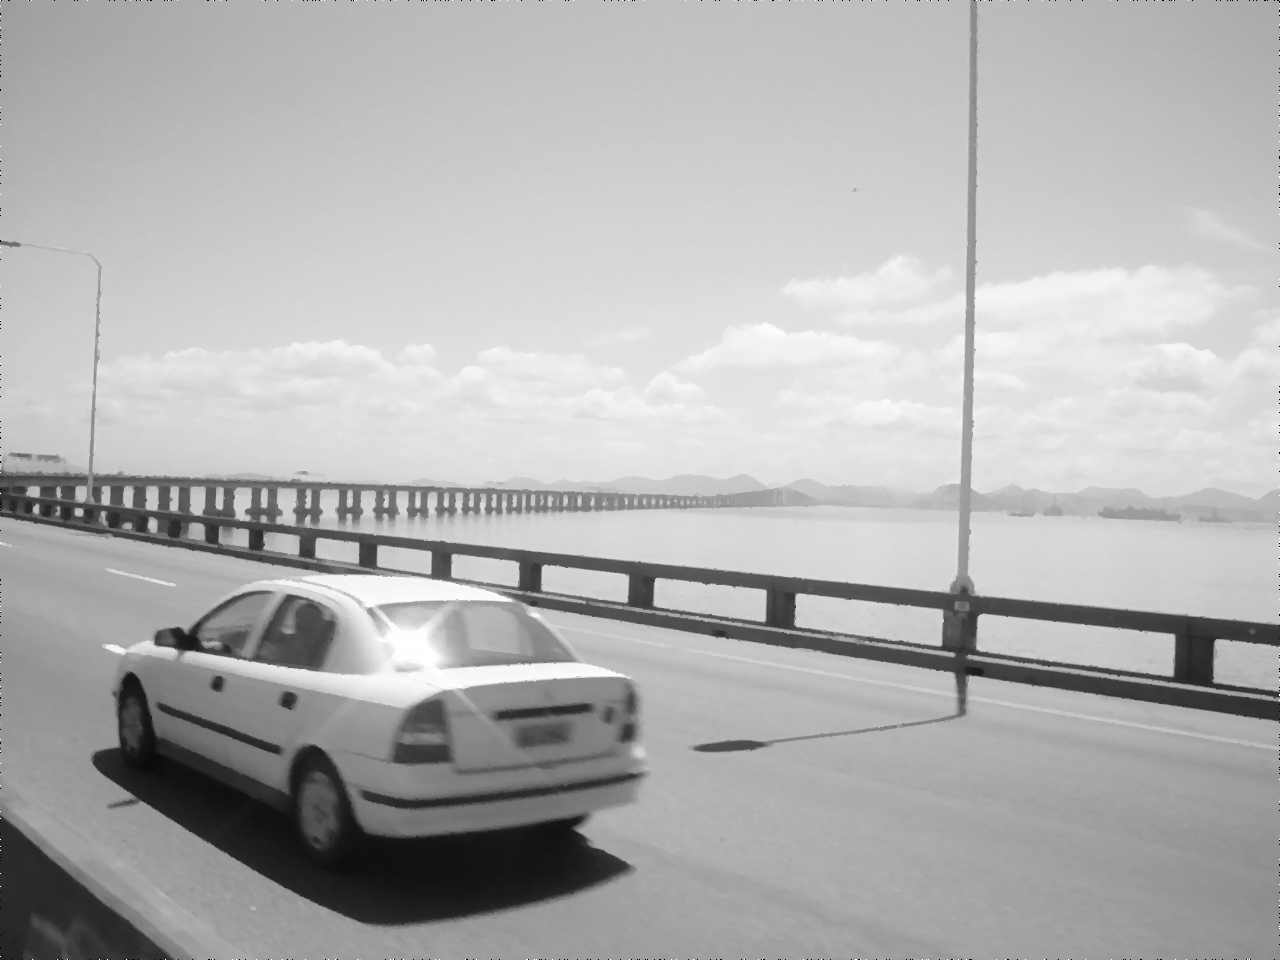

In [16]:
# laplacian filter?

def convolve(w, h, px, kernel):
    # create pixel box
    if (w == 0):
        box = [[0, px[w,h-1], px[w+1,h-1]], [0, px[w,h], px[w+1,h]], [0, px[w,h+1], px[w+1,h+1]]]
    if (h == 0):
            box = [[0, 0, 0, [px[w-1,h], px[w,h], px[w+1,h]], [px[w-1,h+1], px[w,h+1], px[w+1,h+1]]]
    box = [[px[w-1,h-1], px[w,h-1], px[w+1,h-1]], [px[w-1,h], px[w,h], px[w+1,h]], [px[w-1,h+1], px[w,h+1], px[w+1,h+1]]]
    signal.convolve2d(box, kernel, boundary='symm', mode='same')
    return

def apply_laplacian(im):
    px = im.load()
    kernel = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
    width, height = im.size
    # convolve kernel and image
    for w in range(0, width):
        for h in range(0, height):
            convolve(w, h, px, kernel)
    return

apply_laplacian(im)
display(im)